# **Introducción**
El objetivo de la práctica es desarrollar un algoritmo de búsqueda heuristica capaz de encontrar el mejor camino entre dos puntos si lo hubiese. Concretamente tenemos que implmentar el algoritmo A*.

<img src= "https://drive.google.com/uc?export=view&id=1dwgsVd12zAUePSNKjlhQkez5Wn5hqjTT" >


# **Conceptos básicos**


## **Introducción**
El algoritmo A* se clasifica dentro de los algoritmos  de búsqueda de grafos. Este algoritmo tiene como objetivo buscar distintas rutas entre un punto inicial y un punto final, sólo se “construyen” los caminos que son candidatos a formar una posible solución, es decir, los caminos que cumplen con ciertas restricciones, en nuestro caso el camino tiene que ser el de menor  coste entre ambos nodos.
Este algoritmo se basa en el empleo de heurísticas, este concepto se puede definir como una suposición que realizamos partiendo de datos que ya conocemos y de datos sin completar, en otras palabras, es una aproximación cuantitativa de lo que nos falta para llegar a la resolución del problema. 
La heurística determinará el coste computacional que tendrán los distintos algoritmos que se pueden emplear para la resolución del problema, con esto podemos determinar qué algoritmo será el mejor para la resolución del problema. Dependiendo del algoritmo que elijamos tendremos distintas complejidades temporales, la mejor que podríamos conseguir sería lineal, aunque en el peor de los casos será exponencial. La eficiencia del algoritmo A* está ligado de manera directa a que tan buena sea la heurística empleada.
Por otro lado, un problema de este algoritmo es el coste espacial, este será exponencial respecto al tamaño del problema, ya que si un problema a resolver cuenta con muchos nodos se volverá una tarea complicada al tener que considerar todos los sucesores con los costos respectivos.

## **Explicación general**
Ahora procederemos a explicar el algoritmo A*. Este algoritmo se basa en la siguiente función:

        f(n) = g(n) + h(n)

Donde g(n) representa el coste real que se ha requerido desde el nodo inicial hasta el nodo actual, también tenemos h(n) que se trata de la estimación que haremos desde el nodo actual hasta el nodo meta.
Este algoritmo también emplea dos estructuras de datos para almacenar los nodos, por un lado los nodos por los que es factible expandir se almacenarán en la lista Frontera, por su parte aquellos nodos que ya se han expandido y que hemos visitado los almacenaremos en la lista Interior. Gracias a esto el algoritmo puede funcionar de forma “inteligente”, ya que se puede dar el caso de que podamos llegar a la meta por un camino que sea más corto que uno que ya habíamos tomado como mejor, es decir, permite que el algoritmo sea capaz de evaluar nodos que sean más prometedores que los que ya habíamos evaluado.

## **Propiedades de A\***
A* como todo algoritmo de búsqueda en amplitud, es un algoritmo completo, es decir, en caso de que exista una solución siempre dará con ella.
La heurística se pueden emplear para controlar el comportamiento de A*, dependiendo del valor de la heurística tendremos distintos escenarios:
- Por un lado tenemos que si para todo nodo n del grafo se cumple que g(n) = 0, nos encontraremos frente a un algoritmo de búsqueda voraz.
- También tenemos que sí para todo nodo n del grafo se cumple que h(n) = 0, A* actuará como un algoritmo de Dijkstra.
- De la misma manera, sí h(n) es coincide con el coste de moverse de n hasta la meta, entonces el algoritmo A* solo seguirá el mejor camino y nunca expandirá nodos demás, lo que hará que sea muy eficiente. Esto no ocurrirá en todos los casos, solo en ciertos casos especiales.
- Relacionado con el punto anterior, si h(n) es a veces mayor que el coste de moverse de n hasta la meta, entonces el algoritmo no garantiza el camino más corto, pero esto puede hacer que se acelere su eficiencia.

También tenemos que garantizar la admisibilidad del algoritmo, esto se logra a través de la función h(n), dicha función debe de ser una heurística admisible,  es decir, que la función no tiene que sobreestimar el coste real de alcanzar la meta, en otras palabras, para cualquier nodo no final h(n) tiene que ser menor que h*(n).

La función h(n) ha de garantizar que es consistente, esto es, que para cualquier nodo n y para cualquiera de sus nodos hijos (expansiones), el coste coste de llegar al objetivo desde n no será mayor que el de llegar a uno de sus hijos más el coste de llegar desde sus hijos hasta el nodo meta.

# **Implementación de A\***
Para la explicación del pseudocódigo del algoritmo me ayudaré de código para que sea más sencillo.

```
Alg A*
  listaInterior = vacio
  listaFrontera = inicio
  mientras listaFrontera no esté vacía
    n = obtener nodo de listaFrontera con menor f(n) = g(n) + h(n)
    listaFrontera.del(n)
    listaInterior.add(n)
    si n es meta
      devolver
      reconstruir camino desde la meta al inicio siguiendo los punteros
    fsi
    para cada hijo m de n que no esté en listaInterior
      g’(m) = n.g + c(n, m)  //g del nodo a explorar m
      si m no está en listaFrontera
        almacenar la f, g y h del nodo en (m.f, m.g, m.h)
        m.padre = n
        listaFrontera.add(m)
      sino si g’(m) es mejor que m.g  //Verificamos si el nuevo camino es mejor
        m.padre = n
        recalcular f y g del nodo m
      fsi
    fpara
  fmientras
  devolver no hay solución
falg

```

## **Nodo**
En primer lugar hemos tenido que crear esta clase para realizar correctamente la práctica.

Cado nodo tendrá como atributos una posición/casilla, un padre, y las funciones f, g y h.

En el constructor le pasamos la casilla, y un padre  (por defecto no vale nada), y ponemos como a 0 los demás atributos.

In [ ]:
class Nodo():
    def __init__(self, casilla: Casilla, padre = None):
        self.casilla = casilla
        self.f = 0
        self.g = 0
        self.h = 0
        self.coste = 0
        self.padre = padre

También hemos implementado unos getters, que no serán de ayuda en ciertos casos.

In [ ]:
def getF(self) -> float:
    return self.f

def getG(self) -> float:
    return self.g

def getH(self) -> float:
    return self.h

def getPadre(self):
    return self.padre

Y también una especial que nos servirá para comparar los distintos nodos entre si, por ejemplo cuando iteremos sobre una lista, etc. Diremos que dos nodos son iguales si sus filas y columnas coinciden.

In [ ]:
#Sobrecarga del operador ==
def __eq__(self, other):
    return self.casilla == other.casilla

Aquí se llama al operador == de la clase Casilla.

In [ ]:
def __eq__ (self, other):
    return self.fila == other.fila and self.col == other.col

## **A Estrella**

Basandonos en el pseudocódigo que se proporciona, tenemos que crear las dos listas para almacenar los nodos, la **lista frontera** y la **lista interior**.

Creamos un nodo origen y un nodo meta, el nodo origen se añade a la **lista frontera**.

También creamos una variable para ir almacenando el orden en como expandimos los nodos.

In [ ]:
#Coste, -1 si no encuentra camino
coste_total: float = -1

#Estructuras para guardar nodos
listaFrontera: List[Nodo] = []
listaInterior: List[Nodo] = []
estados = iniciaEstados(mapi)

nodoInicial: Nodo = Nodo(origen)
nodoMeta: Nodo = Nodo(destino)

#Se añade a la lista frontera el origen
listaFrontera.append(nodoInicial)

orden = 0

In [ ]:
#Matriz de -1, para los expandidos
def iniciaEstados(mapi):
    estados = []
    for i in range(mapi.alto):
        estados.append([])
        for j in range(mapi.ancho):
            estados[i].append(-1)
    return estados

Ahora procedemos a entrar en el bucle, iteraremos mientras haya elementos en la lista o hasta que encontremos solución. Tras entrar en el bucle sacamos el mejor nodo, en nuestro caso se encontrará en la posición 0 de la lista, esto se debe a que al añadir un elemento a la lista ordenamos la lista para que los elementos con menor f estén primero. Y también guardamos el orden en el que se van expandiendo los nodos.

In [ ]:
while listaFrontera:
    # Cogemos el mejor nodo de la lista Frontera
    n: Nodo = listaFrontera[0]
    estados[n.casilla.fila][n.casilla.col] = orden
    orden += 1

Ahora comprobamos si ya hemos llegado a la meta, si ese fuese el caso tendríamos ya hemos terminado la ejecución. El coste total se encontrará en la f del mejor nodo, y procedemos a reconstruir el camino el camino, para ello cogemos la fila y columna del mejor nodo y en la matriz camino, en la mismo posición asignamos una X, y ahora el mejor nodo será el padre, haremos esto hasta que un nodo no tenga padre. También mostramos el camino expandido y además cuantos nodos hemos explorado.  

In [ ]:
if(n == nodoMeta):
      coste_total = n.f
      reconstruyeCamino(n, caminos)
      camino_expandido(estados, mapi)

      print("Nodos explorados: ", len(listaInterior))
      break

Función de reconstruir el camino y camino_expandido.

In [ ]:
def reconstruyeCamino(n: Nodo, caminos):
    while(n.getPadre()):
        caminos[n.casilla.getFila()][n.casilla.getCol()] = 'X'
        n = n.getPadre()

def camino_expandido(camino, mapi):
    for i in range(mapi.alto):
        for j in range(mapi.ancho):
            print(camino[i][j], end=" ")
        print()

Si no es meta, tendremos que borrar el nodo n de la lista frontera y añadirlo a la lista interior. Y procedemos a mirar los vecinos válidos del nodo n/mejor.

In [ ]:
else:
    """Expandimos nodo"""
    listaInterior.append(n)
    listaFrontera.remove(n)

Para sacar los vecinos he diseñado una función, iteramos desde una posición anterior a la fila del nodo n hasta una posterior, y dentro hacemos lo mismo dentro con las columnas. Luego miramos si una posición es correcta/válida, definimos una posición válida como una posición que tiene como carácter '.' o el número 0, ya que así está definido en el mapa, y además hay que comprobar que cada posición sea distinta de la actual, ya que no tiene sentido volver a evaluar la posición actual.

In [ ]:
def vecinos(nodo: Nodo, mapa: Mapa) -> List:
    vecinos: List = []
    for i in range(nodo.casilla.getFila() - 1, nodo.casilla.getFila() + 2):
        for j in range(nodo.casilla.getCol() - 1, nodo.casilla.getCol() + 2):
            if esCorrecto(i, j, nodo.casilla, mapa):
                vecinos.append(Nodo(Casilla(i, j), nodo))

    return vecinos

In [ ]:
def esCorrecto(fila, columna, origen, mapa) -> bool:
    correcto: bool = False

    if(fila != origen.getFila() or columna != origen.getCol()) and \
            mapa.getCelda(fila, columna) == 0:
        correcto = True
    return correcto

Ahora iteramos sobre los vecinos, y tenemos que comprobar si cada vecino está en la lista interior, si se encuentra pasamos al siguiente, esto se debe a que si ya está en la lista interior no tenemos que volver a hacer operaciones sobre este nodo.

Ahora calculamos la g_m, esto se define como la suma de la g del mejor nodo más el coste de movernos desde el nodo n a su hijo.

In [ ]:
for hijo in vecinos(n, mapi):
      if hijo not in listaInterior:
          g_m = n.g + costeCelda(hijo, n)

La función para sacar el coste es la siguiente, es funcionamiento es sencillo, sacamos el valor absoluto de la resta entre la fila del mejor nodo y la del hijo, y lo mismo para las columnas, hacemos lo mismo para la columna, luego sumanos estos dos valores, si el resultado es 1 se tratará de un movimiento en una dirección y tendrá como coste 1, si es 2 se tratará de un movimiento en diagonal y tendrá como coste 1.5. 

In [ ]:
def costeCelda(vecino: Nodo, n: Nodo) -> float:
    x = abs(n.casilla.fila - vecino.casilla.fila)
    y = abs(n.casilla.col - vecino.casilla.col)
    if x + y == 1:
        return 1.0
    else:
        return 1.5

Ahora miramos si el nodo hijo se encuentra en la lista frontera, si no se encuentra el nodo se añade directamente a la lista frontera, antes tendremos que calcular las funciones g, h y f del nodo hijo, asignamos como padre al nodo n y se añade en la lista frontera, después de esto lo que tenemos que hacer es ordenar la lista para que los elementos con menor f se encuentren en las primeras posiciones.

In [ ]:
if hijo not in listaFrontera:
      hijo.padre = n
      hijo.g = g_m
      hijo.h = distanciaManhattan(hijo, nodoMeta)
      hijo.f = hijo.g + hijo.h
      listaFrontera.append(hijo)
      listaFrontera.sort(key=lambda nodo: nodo.f)

Si el nodo se encuentra en la lista frontera, tenemos que mirar si viniendo por el nuevo camino es más óptimo que por que ya tiene asignado, para ello comprobamos si la g_m que hemos calculado es menor que la g del hijo, si es menor recalculamos las funciones f, g y h, y tambíen cambiamos el padre.

In [ ]:
elif g_m < hijo.g:
      hijo.padre = n
      hijo.g = g_m
      hijo.h = distanciaManhattan(hijo, nodoMeta)
      hijo.f = hijo.g + hijo.h

Finalmente, tras acabar el bucle while devolveremos el coste, si no ha encontrado el camino devolverá un menos 1, si no el coste que hayamos calculado.

# **Traza del algoritmo**
Vamos a ver una traza de ejemplo, para ver como funciona el algoritmo de manera visual.


# **Heurísticas**


Como se ha comentado anteriormente, el concepto de heurística hace referencia a una información con la que dotamos de inteligencia a nuestro algoritmo, su objetivo principal es acelerar la búsqueda.

Antes de comentar las distintas heurísticas que se han implementado, hay que comentar lo que es una **heurística admisible**.

Como se ha mencionado en las clases teóricas, una heurística es admisible si nunca sobreestima el coste de alcanzar el objetivo. Es decir, si el valor que da para cada celda es siempre menor o igual que el coste mínimo para alcanzar el objetivo.


>ℎ(𝑛) ≤ ℎ∗(𝑛) 

Siendo ℎ∗(𝑛) el coste mínimo real de la celda n al objetivo.

Por lo que se ha comentado, la función heurística juega un papel muy importante dentro del algoritmo A*. La mejor heurística va a depender del tipo de problema al que nos estemos enfrentando, si no se conoce cuál es la heurística ideal para un problema lo recomendable es probar con varias y analizaremos viendo si el camino es el óptimo (el de menor coste) y además viendo cuantos nodos explora.

## **Sin Heurística**
Este valor como tal no se trata de ninguna heurística, esta "heurística" toma valor 0, un ventaja de esto es que esta heurística es simple, pero el gran problema que supone su uso es que expandiremos muchos más nodos.

        h = 0

## **Distancia de Manhattan**
La distancia de Manhattan o Geometría del Taxi, se defiene como la suma de las diferencias absolutas de las coordenadas de la celda origen y de la celda destino. Es decir, la distancia entre la celda 1 y la celda 2, sería:
       
       h = |𝑥2−𝑥1|+|𝑦2−𝑦1|

La distancia de Manhattan es la distancia estandar para mapas cuadrados, sobretodo para los mapas que permiten movimientos en las 4 direcciones.

<img src= "https://drive.google.com/uc?export=view&id=1c5gJbr6Cp5jKGWMLNx4CKCxe7mSs2rqg">

 ## **Distancia Euclidea**
La distancia Euclidea, también llamada distancia ordinaria debido a que es la distancia en "linea recta", es un concepto muy humano por así decirlo. La fórmula de la distancia Euclidea es la siguiente:

    h = sqrt((𝒙𝟐−𝒙𝟏)𝟐+(𝒚𝟐−𝒚𝟏))

La distancia Euclidea tiene un gran potencial en mapa cuadrados que permitan el movimiento en cualquier dirección.

<img src= "https://drive.google.com/uc?export=view&id=1dr_Z22RCe638V36Fl6Y6EXqMFLd_nBFu">


## **Distancia Chebyshev**
La distancia de Chebyshev o también conocida como la mínima distancia que le toma a un rey (en el ajedrez) ir desde un punto a otro. Esta distancia se determina como la mayor distancia en uno de los ejes. La fórmula es la siguiente:

      h = max( | x2 - x1 |, | y2 - y1 |)

<img src= "https://drive.google.com/uc?export=view&id=1B4ha-KPeXn6fn8_BLLxF-pRtBP0IR1ep">


## **Distancia Diagonal**
La distancia diagonal es muy útil si nuestro mapa permite movimiento diagonal, sobretodo cuando el coste de movernos en diagonal es distinto del movimiento en alguna dirección.  Es muy eficaz porque "decide" cuando ir en diagonal y cuando ir en vertical u horizontal. Viene definido por la siguiente fórmula:

      h =  sqrt(2) * diagonalStep + straightSteps

<img src= "https://drive.google.com/uc?export=view&id=1_GKY1K77HacvquEyJjCgtFIVuv8XfcSX">

## **Distancia Cuadrática**
La distancia cuadrática es muy parecida a la distancia Euclidea, en este caso la raíz cuadrada desaparece, viene definida por la siguiente fórmula:

      h = (𝒙𝟐−𝒙𝟏)𝟐+(𝒚𝟐−𝒚𝟏)


# **Mapas Propios**

Se han decidido crear 2 mapas para comparas las distintas heurísticas.

## **Mapa Propio 1**

<img src= "https://drive.google.com/uc?export=view&id=1bA8_Us9Wt7JGE9waIuRU_fFRLDB2_OSC">


## **Mapa Propio 2**

<img src= "https://drive.google.com/uc?export=view&id=1W6KK45WeN0XYHbv7SRwoFZ5XXaDBmdmU">

# **Comparativa**

## **Nodos expandidos**
Vamos a comparar el número de nodos que se expanden (tamaño de la lista interior) respecto al coste.


### **Mapa 1**

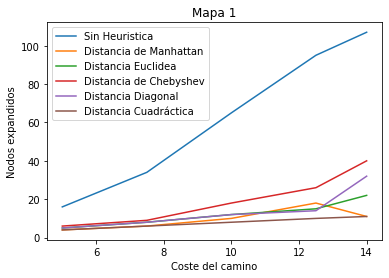

In [1]:
import matplotlib.pyplot as plt
#Mapa 1
#Heuristica 0
x = [5, 7.5, 10, 12.5, 14]
y = [16, 34, 65, 95, 107]

#Manhattan
xMan = [5, 7.5, 10, 12.5, 14]
yMan = [4, 6, 10, 18, 11]

#Euclidea
xEuc = [5, 7.5, 10, 12.5, 14]
yEuc = [5, 8, 12, 15, 22]

#Chebyshev
xChev = [5, 7.5, 10, 12.5, 14]
yChev = [6, 9, 18, 26, 40]

#Diagonal
xDiag = [5, 7.5, 10, 12.5, 14]
yDiag = [5, 8, 12, 14, 32]

#Cuadratica
xCuadr = [5, 7.5, 10, 12.5, 14]
yCuadr = [4, 6, 8, 10, 11]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa 1')

ax.plot(x, y, label="Sin Heuristica")
ax.plot(xMan, yMan, label="Distancia de Manhattan")
ax.plot(xEuc, yEuc, label="Distancia Euclidea")
ax.plot(xChev, yChev, label="Distancia de Chebyshev")
ax.plot(xDiag, yDiag, label="Distancia Diagonal")
ax.plot(xCuadr, yCuadr, label="Distancia Cuadráctica")


#Pone título a los ejes 
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

### **Mapa Propio 1**

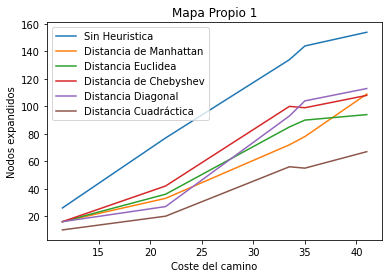

In [2]:

import matplotlib.pyplot as plt
#Mapa 1
#Heuristica 0
x = [11.5, 21.5, 33.5, 35, 41]
y = [26, 77, 134, 144, 154]

#Manhattan
xMan = [11.5, 21.5 , 33.5, 35, 41]
yMan = [16, 33, 72, 78, 109]

#Euclidea
xEuc = [11.5, 21.5 , 33.5, 35, 41]
yEuc = [16, 36, 85, 90, 94]

#Chebyshev
xChev = [11.5, 21.5 , 33.5, 35, 41]
yChev = [16, 42, 100, 99, 108]

#Diagonal
xDiag = [11.5, 21.5 , 33.5, 35, 41]
yDiag = [16, 27, 93, 104, 113]

#Cuadratica
xCuadr = [11.5, 21.5 , 33.5, 35, 41]
yCuadr = [10, 20, 56, 55, 67]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa Propio 1')

ax.plot(x, y, label="Sin Heuristica")
ax.plot(xMan, yMan , label="Distancia de Manhattan")
ax.plot(xEuc, yEuc , label="Distancia Euclidea")
ax.plot(xChev, yChev , label="Distancia de Chebyshev")
ax.plot(xDiag, yDiag, label="Distancia Diagonal")
ax.plot(xCuadr, yCuadr, label="Distancia Cuadráctica")


#Pone título a los ejes 
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()


### **Mapa Propio 2**

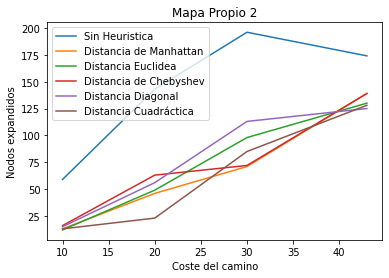

In [4]:

import matplotlib.pyplot as plt
#Mapa 1
#Heuristica 0
x = [10, 20, 30, 43]
y = [59, 143, 196, 174]

#Manhattan
xMan = [10, 20, 30, 43]
yMan = [13, 46, 71, 139]

#Euclidea
xEuc = [10, 20, 30, 43]
yEuc = [12, 49, 98, 130]

#Chebyshev
xChev = [10, 20, 30, 43]
yChev = [16, 63, 72, 139]

#Diagonal
xDiag = [10, 20, 30, 43]
yDiag = [15, 56, 113, 125]

#Cuadratica
xCuadr = [10, 20, 30, 43]
yCuadr = [13, 23, 85, 128]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa Propio 2')

ax.plot(x, y, label="Sin Heuristica")
ax.plot(xMan, yMan , label="Distancia de Manhattan")
ax.plot(xEuc, yEuc , label="Distancia Euclidea")
ax.plot(xChev, yChev , label="Distancia de Chebyshev")
ax.plot(xDiag, yDiag, label="Distancia Diagonal")
ax.plot(xCuadr, yCuadr, label="Distancia Cuadráctica")


#Pone título a los ejes 
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

# **Referencias**

* [Heuristics](http://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html)
* [Introduction to the A* Algorithm from Red Blob Games](https://www.redblobgames.com/pathfinding/a-star/introduction.html)
* [Implementation of A*](https://www.redblobgames.com/pathfinding/a-star/implementation.html)
* [A* pathfinding algorithm](https://www.growingwiththeweb.com/2012/06/a-pathfinding-algorithm.html)




